## scikit-learn digits dataset example
add conv layers

In [1]:
%matplotlib inline
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [2]:
import sys
sys.path.append('/home/admin/github/wordroid.sblo.jp/lib')
from keras_ex.GaussianKernel import GaussianKernel

# or copy and paste the definition of `GaussianKernel` here.

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import cluster, datasets, mixture
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from keras.layers import Input, Embedding, LSTM, GRU, Dense, Dropout, Lambda, \
    Conv1D, Conv2D, Conv3D, \
    Conv2DTranspose, \
    AveragePooling1D, \
    MaxPooling1D, MaxPooling2D, MaxPooling3D, \
    GlobalAveragePooling1D, \
    GlobalMaxPooling1D, GlobalMaxPooling2D, \
    LocallyConnected1D, LocallyConnected2D, \
    concatenate, Flatten, Average, Activation, \
    RepeatVector, Permute, Reshape, Dot, \
    multiply, dot, add, \
    PReLU, \
    Bidirectional, TimeDistributed, \
    SpatialDropout1D, \
    BatchNormalization
from keras.models import Model, Sequential
from keras import losses
from keras.callbacks import BaseLogger, ProgbarLogger, Callback, History
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers
from keras import initializers
from keras.metrics import categorical_accuracy
from keras.constraints import maxnorm, non_neg
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from keras import backend as K

In [4]:
digits = load_digits()
X, y = digits.data, digits.target
X.shape

(1797, 64)

In [5]:
X_sc = X / 16.0
X_sc.shape

(1797, 64)

In [6]:
X_sc = X_sc.reshape((-1, 8, 8, 1))
X_sc.shape

(1797, 8, 8, 1)

0

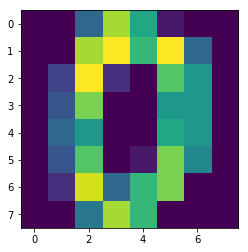

In [7]:
plt.imshow(X_sc[0,:,:,0])
y[0]

In [8]:
y_cat = to_categorical(y)
y_cat

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

### create model

In [9]:
np.random.seed(0)
num_lm = 100
num_lm2 = 20

def make_modelz():
    inp = Input(shape=(8, 8, 1), name='inp')
    oup = inp
    
    oup = Conv2D(32, (2, 2), activation="relu")(oup)
    oup = Conv2D(32, (2, 2), activation="relu")(oup)
    model_2d = Model(inp, oup)
    oup = MaxPooling2D(pool_size=(2,2))(oup)
    oup = Flatten()(oup)
    
    oup_gk1 = GaussianKernel(num_lm, 288, kernel_gamma=1./(2.*288*0.1), name='gkernel1')(oup)
    model_gk1 = Model(inp, oup_gk1)
    
    oup_gk2 = GaussianKernel(num_lm2, num_lm, kernel_gamma=1./(2.*num_lm*0.1), name='gkernel2')(oup_gk1)
    model_gk2 = Model(inp, oup_gk2)
    
    oup = Dense(10, activation='softmax')(oup_gk2)
    
    model = Model(inp, oup)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return {
        'model': model,
        'model_gk1': model_gk1,
        'model_gk2': model_gk2,
        'model_2d': model_2d,
    }

models = make_modelz()
model = models['model']
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 8, 8, 1)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 32)          160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
_________________________________________________________________
gkernel1 (GaussianKernel)    (None, 100)               28800     
_________________________________________________________________
gkernel2 (GaussianKernel)    (None, 20)                2000      
__________

### train

In [10]:
model.fit(X_sc, y_cat, verbose=0,
          batch_size=32,
          epochs=150)

/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:95: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


### predict

In [11]:
y_pred = model.predict(X_sc)
y_pred

array([[  6.10534370e-01,   1.80170953e-01,   1.81998382e-03, ...,
          2.82154360e-04,   1.05373345e-01,   5.95222674e-02],
       [  1.58875331e-01,   4.00804371e-01,   7.60840019e-03, ...,
          2.17174646e-03,   2.31818810e-01,   8.85357335e-02],
       [  3.11473286e-06,   6.62225811e-03,   2.25372761e-01, ...,
          3.39699805e-01,   1.82640944e-02,   2.99890675e-02],
       ..., 
       [  1.10551766e-04,   5.74466363e-02,   5.95580414e-02, ...,
          8.61704051e-02,   6.98419437e-02,   3.24821547e-02],
       [  9.38691944e-03,   6.92917928e-02,   7.66119733e-02, ...,
          8.66972003e-03,   1.48346215e-01,   2.96589404e-01],
       [  1.13564101e-03,   1.07316583e-01,   1.12251326e-01, ...,
          5.65606132e-02,   1.61530539e-01,   1.33830488e-01]], dtype=float32)

In [12]:
confusion_matrix(y, np.argmax(y_pred, axis=1))

array([[172,   5,   0,   0,   0,   0,   0,   0,   1,   0],
       [  4, 125,   0,   0,   0,   0,  24,   0,  13,  16],
       [  0,   0, 147,   1,   0,   1,   2,  24,   0,   2],
       [  0,   0,   3, 159,   0,  14,   0,   0,   0,   7],
       [  0,   0,   0,   0, 177,   0,   2,   2,   0,   0],
       [  0,   0,   6,   5,   1, 169,   0,   1,   0,   0],
       [  0,   1,   5,   0,   1,   0, 169,   5,   0,   0],
       [  0,   0,   5,   0,  12,   0,   1, 161,   0,   0],
       [  3,  44,   0,   2,   0,   0,  23,   0,  62,  40],
       [  0,   1,  13, 104,   0,   0,  13,   0,   5,  44]])

In [13]:
print(classification_report(y, np.argmax(y_pred, axis=1)))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96       178
          1       0.71      0.69      0.70       182
          2       0.82      0.83      0.83       177
          3       0.59      0.87      0.70       183
          4       0.93      0.98      0.95       181
          5       0.92      0.93      0.92       182
          6       0.72      0.93      0.81       181
          7       0.83      0.90      0.87       179
          8       0.77      0.36      0.49       174
          9       0.40      0.24      0.30       180

avg / total       0.76      0.77      0.75      1797



### plot output of Conv layer

In [14]:
pred_conv = models['model_2d'].predict(X_sc)
pred_conv.shape

(1797, 6, 6, 32)

0


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


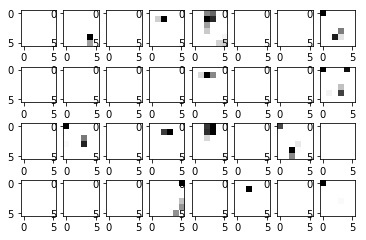

In [15]:
nrows=4
ncols=8
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

idx = 0
print(y[idx])
for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[idx][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

1


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


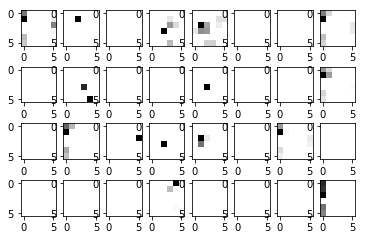

In [16]:
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

idx = 1
print(y[idx])
for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[idx][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

2


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


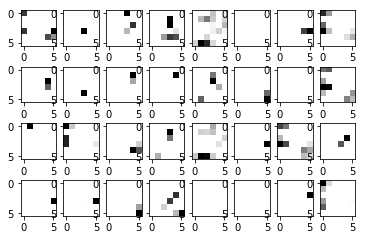

In [17]:
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

idx = 2
print(y[idx])
for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[idx][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

3


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


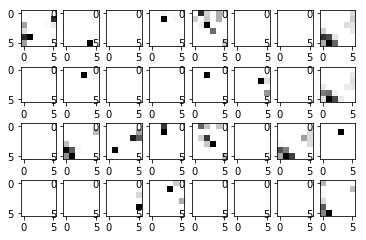

In [18]:
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

idx = 3
print(y[idx])
for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[idx][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

4


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


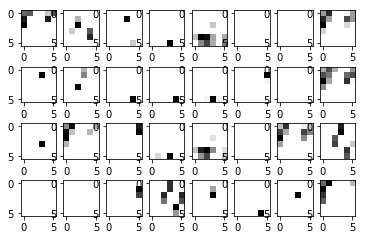

In [19]:
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

idx = 4
print(y[idx])
for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[idx][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

5


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


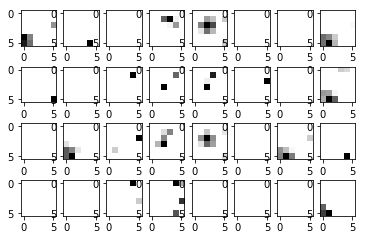

In [20]:
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

idx = 5
print(y[idx])
for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[idx][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

6


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


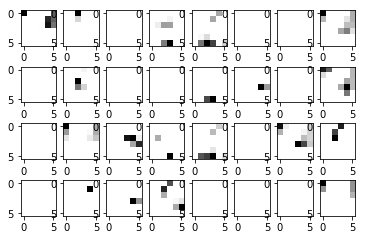

In [21]:
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

idx = 6
print(y[idx])
for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[idx][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

7


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


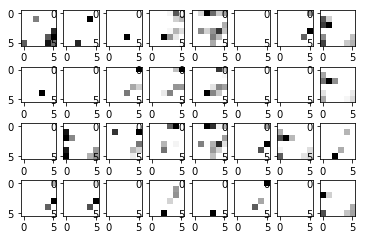

In [22]:
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

idx = 7
print(y[idx])
for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[idx][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

8


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


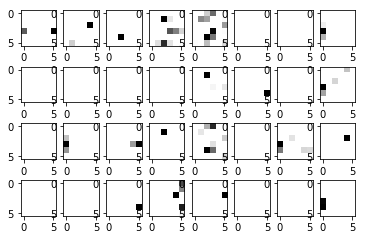

In [23]:
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

idx = 8
print(y[idx])
for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[idx][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

9


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


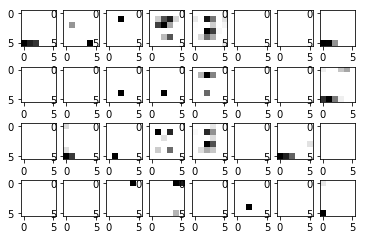

In [24]:
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

idx = 9
print(y[idx])
for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[idx][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

### plot output of GaussianKernel layer #1

In [25]:
lm2 = model.get_layer('gkernel2').get_weights()[0]
lm2.shape

(20, 100)

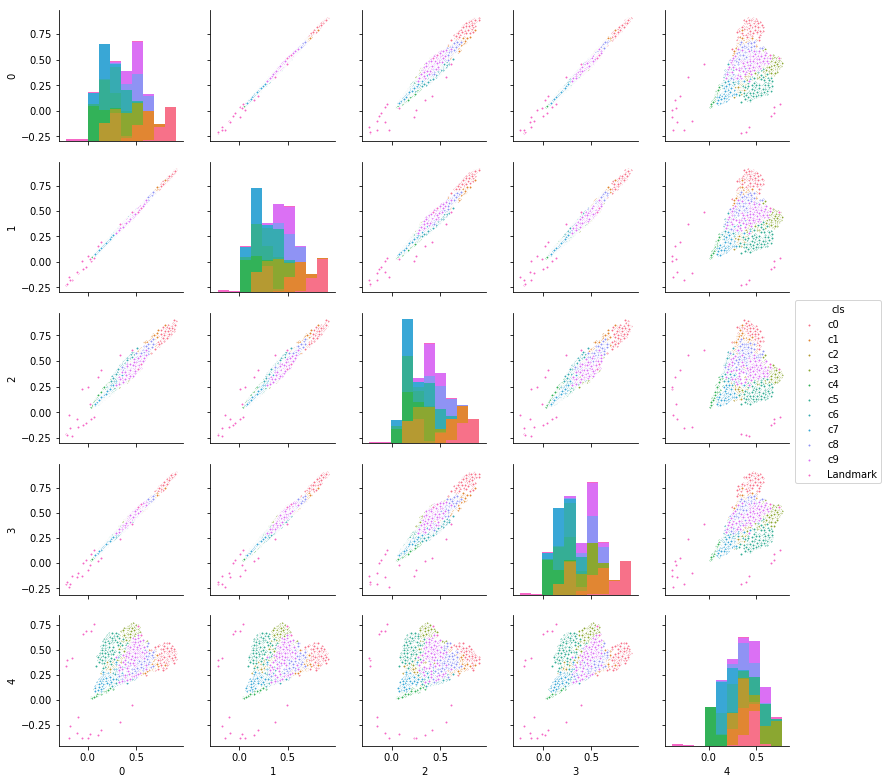

In [26]:
gk1_pred = models['model_gk1'].predict(X_sc, batch_size=1024)
df = pd.DataFrame(np.vstack([gk1_pred, lm2])[:,:5])
df['cls'] = ['c'+str(ee) for ee in y] + ['Landmark'] * lm2.shape[0]
sns.pairplot(df, markers='.', hue='cls', size=2.2)

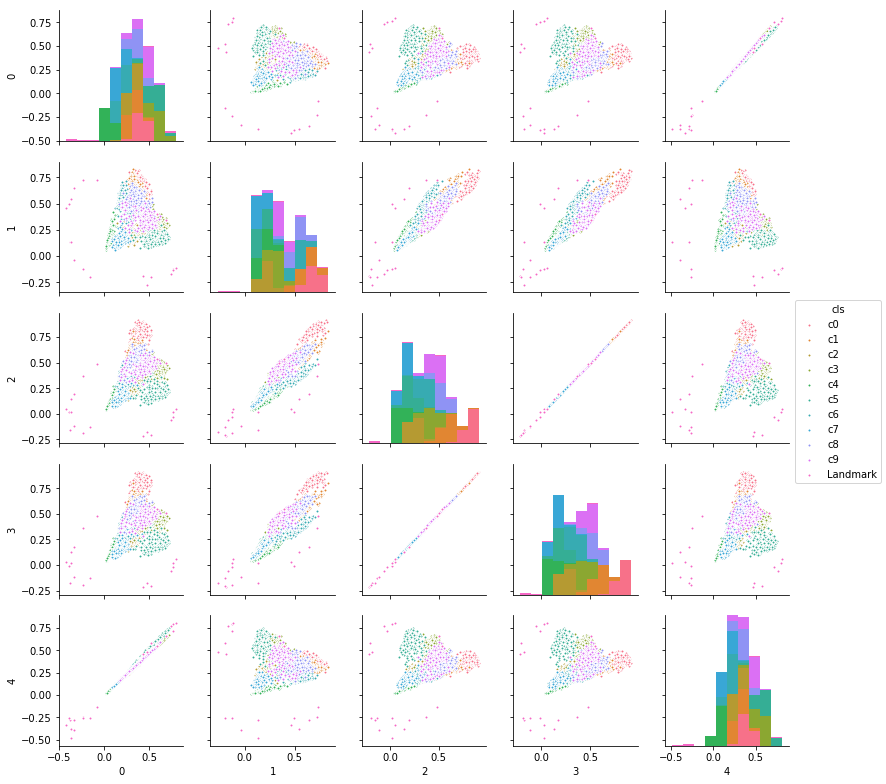

In [27]:
df = pd.DataFrame(np.vstack([gk1_pred, lm2])[:,50:55])
df['cls'] = ['c'+str(ee) for ee in y] + ['Landmark'] * lm2.shape[0]
sns.pairplot(df, markers='.', hue='cls', size=2.2)

### plot output of GaussianKernel layer #2

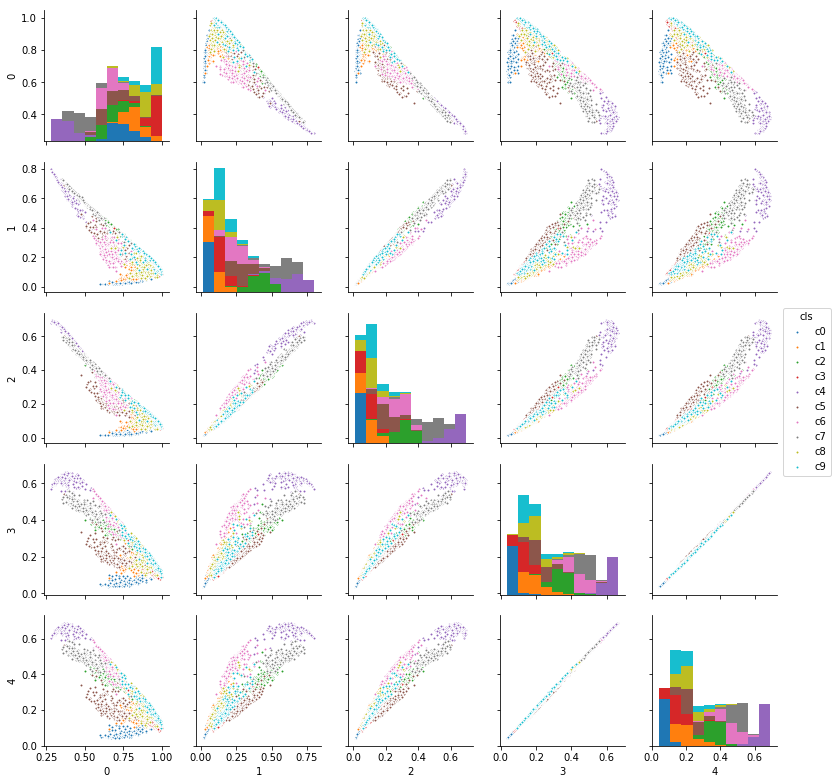

In [28]:
gk2_pred = models['model_gk2'].predict(X_sc)
df = pd.DataFrame(gk2_pred[:,:5])
df['cls'] = ['c'+str(ee) for ee in y]
sns.pairplot(df, markers='.', hue='cls', size=2.2)

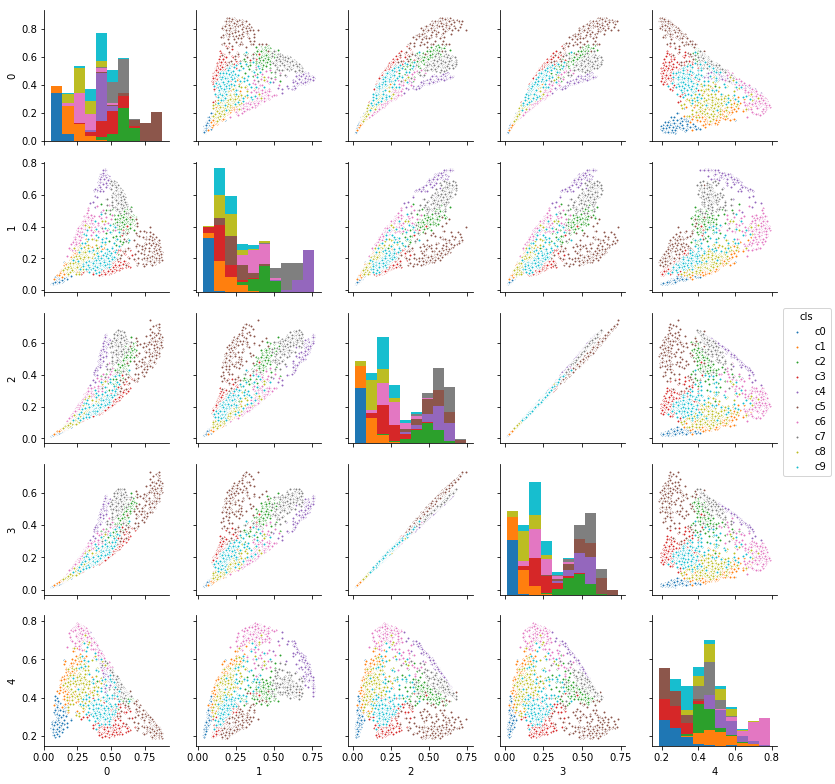

In [29]:
df = pd.DataFrame(gk2_pred[:,5:10])
df['cls'] = ['c'+str(ee) for ee in y]
sns.pairplot(df, markers='.', hue='cls', size=2.2)

### train more

In [30]:
model.fit(X_sc, y_cat, verbose=0,
          batch_size=32,
          epochs=1500)

### predict

In [31]:
y_pred = model.predict(X_sc)
y_pred

array([[  9.99928594e-01,   1.94278323e-06,   2.59573461e-12, ...,
          8.74386712e-20,   4.63436954e-05,   1.05243644e-05],
       [  2.15309348e-09,   9.99685049e-01,   2.72500329e-04, ...,
          3.53737010e-15,   8.38281630e-06,   1.43475931e-09],
       [  9.87984447e-14,   1.58766725e-05,   9.95711446e-01, ...,
          1.21716619e-03,   1.83753757e-04,   6.61520462e-05],
       ..., 
       [  9.62426512e-08,   1.16205396e-04,   1.23381360e-05, ...,
          3.89547491e-11,   9.89785135e-01,   1.43438328e-07],
       [  5.00197643e-08,   7.57144036e-09,   6.85422783e-05, ...,
          5.11417284e-06,   2.12706818e-05,   9.99809921e-01],
       [  6.63824196e-08,   2.30917765e-04,   8.84264591e-05, ...,
          4.12339385e-10,   9.85379755e-01,   7.37814617e-07]], dtype=float32)

In [32]:
confusion_matrix(y, np.argmax(y_pred, axis=1))

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 177,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 183,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 181,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 182,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 181,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 179,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 174,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 180]])

In [33]:
print(classification_report(y, np.argmax(y_pred, axis=1)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       178
          1       1.00      1.00      1.00       182
          2       1.00      1.00      1.00       177
          3       1.00      1.00      1.00       183
          4       1.00      1.00      1.00       181
          5       1.00      1.00      1.00       182
          6       1.00      1.00      1.00       181
          7       1.00      1.00      1.00       179
          8       1.00      1.00      1.00       174
          9       1.00      1.00      1.00       180

avg / total       1.00      1.00      1.00      1797



### plot output of Conv layer

In [34]:
pred_conv = models['model_2d'].predict(X_sc)
pred_conv.shape

(1797, 6, 6, 32)

0


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


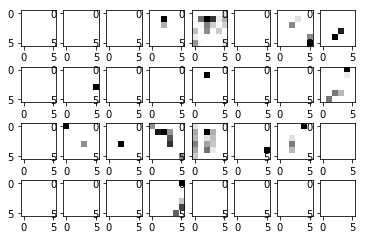

In [35]:
nrows=4
ncols=8
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

idx = 0
print(y[idx])
for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[idx][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

1


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


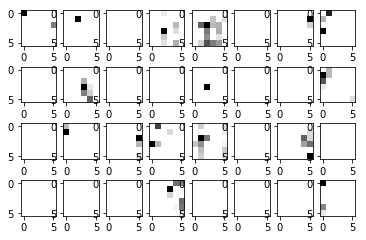

In [36]:
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

idx = 1
print(y[idx])
for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[idx][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

2


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


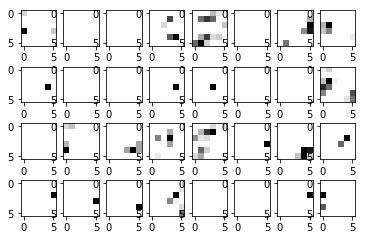

In [37]:
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

idx = 2
print(y[idx])
for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[idx][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

3


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


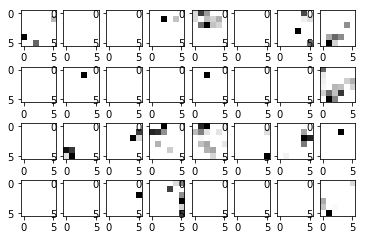

In [38]:
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

idx = 3
print(y[idx])
for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[idx][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

4


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


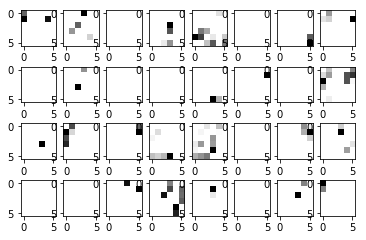

In [39]:
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

idx = 4
print(y[idx])
for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[idx][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

5


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


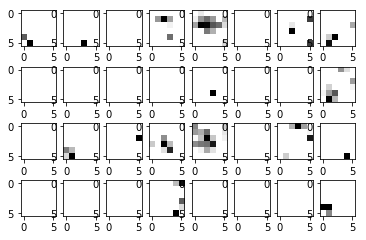

In [40]:
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

idx = 5
print(y[idx])
for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[idx][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

6


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


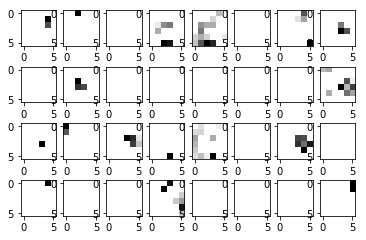

In [41]:
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

idx = 6
print(y[idx])
for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[idx][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

7


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


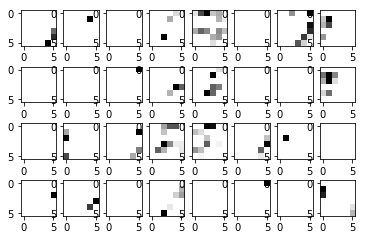

In [42]:
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

idx = 7
print(y[idx])
for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[idx][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

8


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


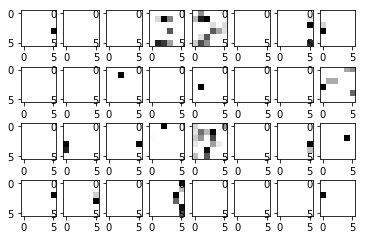

In [43]:
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

idx = 8
print(y[idx])
for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[idx][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

9


/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


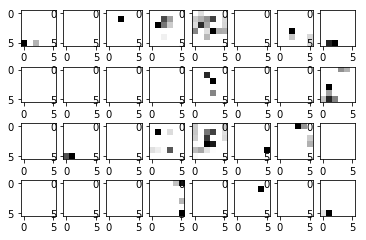

In [44]:
fig, subs = plt.subplots(nrows=nrows, ncols=ncols)

idx = 9
print(y[idx])
for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii,jj]
        img_array = pred_conv[idx][:,:,ii*ncols+jj]
        img_array = (img_array / img_array.max() * 255).astype(np.uint8)
        iplt.imshow(img_array, cmap='binary')

### plot output of GaussianKernel layer #1

In [45]:
lm2 = model.get_layer('gkernel2').get_weights()[0]
lm2.shape

(20, 100)

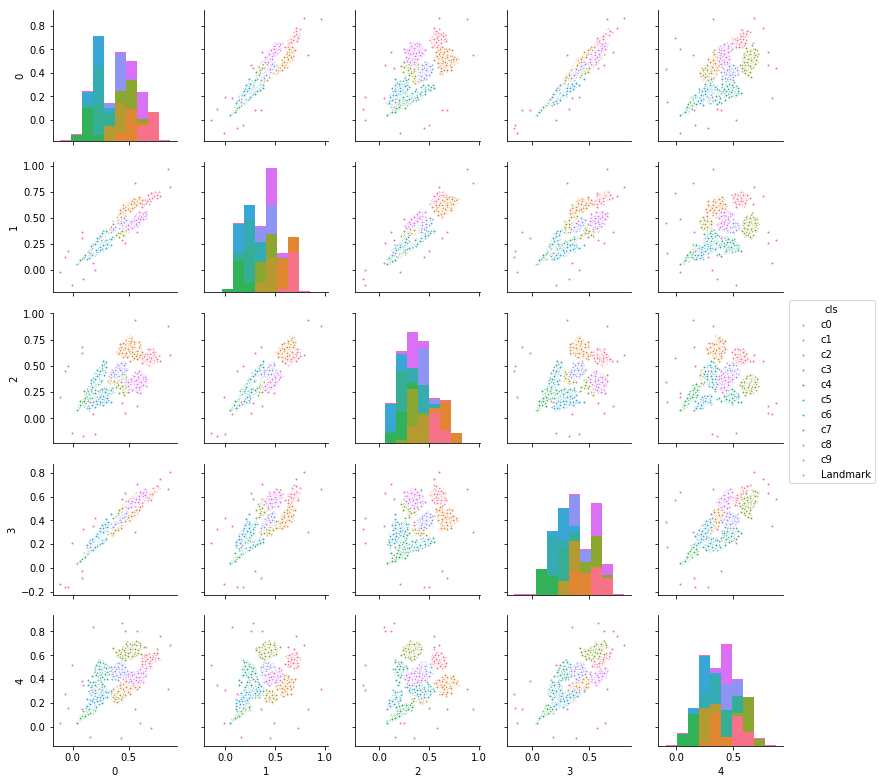

In [46]:
gk1_pred = models['model_gk1'].predict(X_sc, batch_size=1024)
df = pd.DataFrame(np.vstack([gk1_pred, lm2])[:,:5])
df['cls'] = ['c'+str(ee) for ee in y] + ['Landmark'] * lm2.shape[0]
sns.pairplot(df, markers='.', hue='cls', size=2.2)

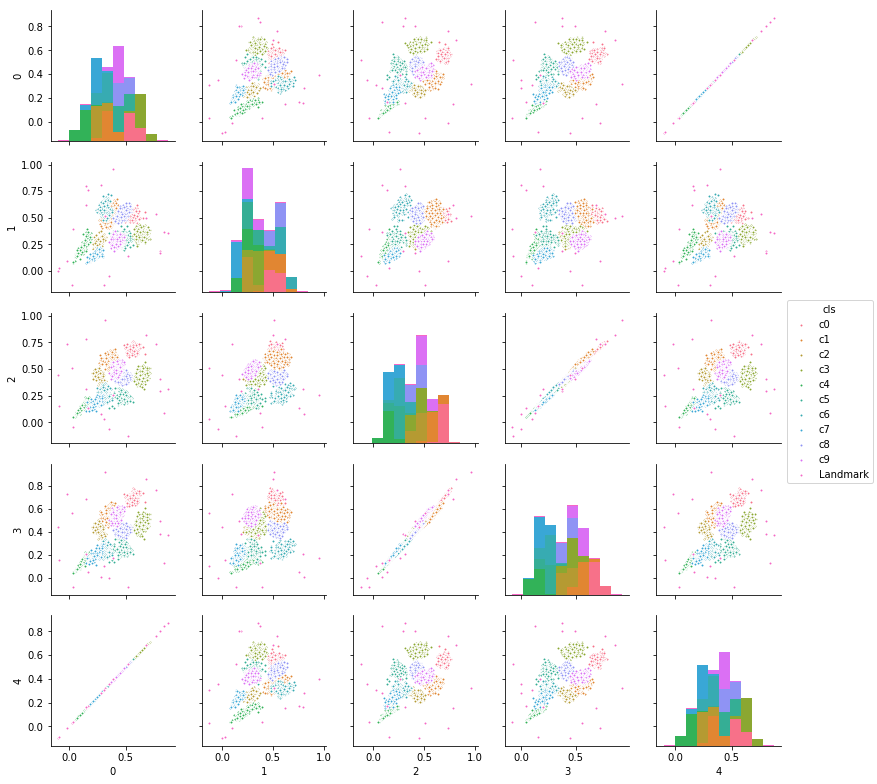

In [47]:
df = pd.DataFrame(np.vstack([gk1_pred, lm2])[:,50:55])
df['cls'] = ['c'+str(ee) for ee in y] + ['Landmark'] * lm2.shape[0]
sns.pairplot(df, markers='.', hue='cls', size=2.2)

### plot output of GaussianKernel layer #2

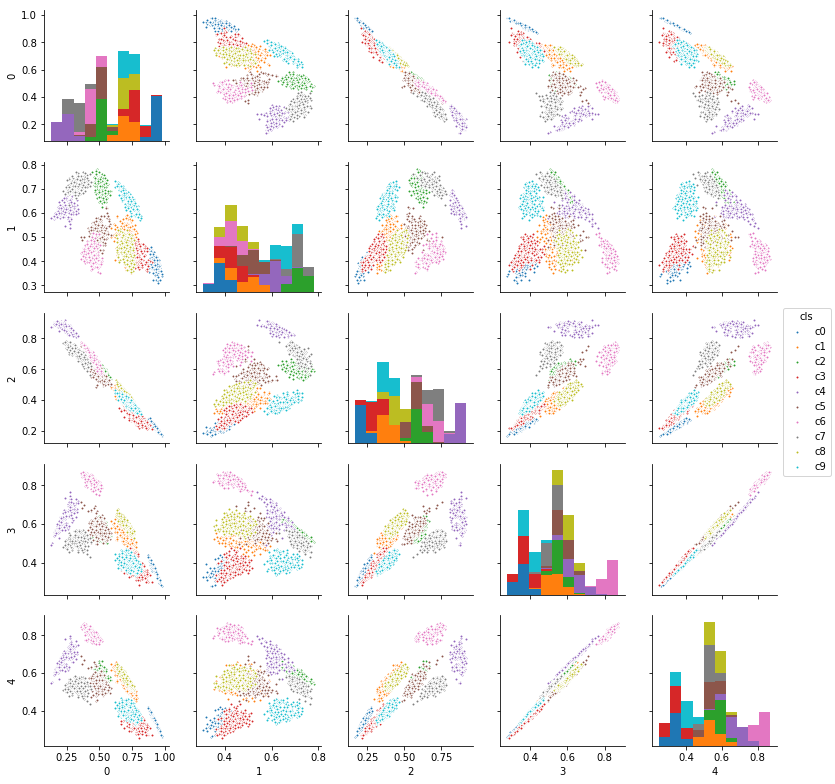

In [48]:
gk2_pred = models['model_gk2'].predict(X_sc)
df = pd.DataFrame(gk2_pred[:,:5])
df['cls'] = ['c'+str(ee) for ee in y]
sns.pairplot(df, markers='.', hue='cls', size=2.2)

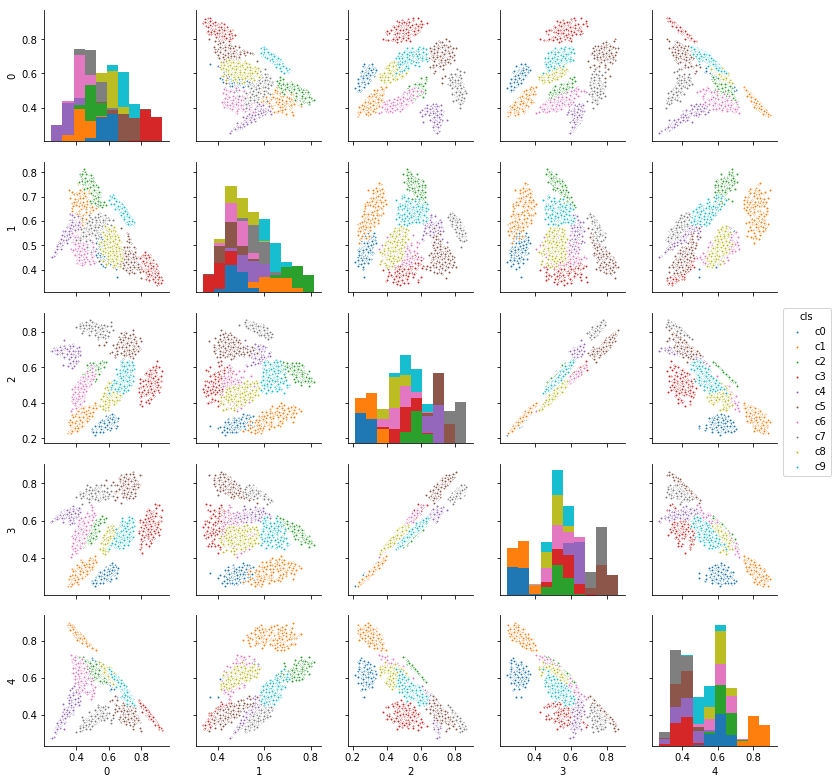

In [49]:
df = pd.DataFrame(gk2_pred[:,5:10])
df['cls'] = ['c'+str(ee) for ee in y]
sns.pairplot(df, markers='.', hue='cls', size=2.2)